In [42]:
! python --version

Python 3.7.3


In [43]:
# load data
import numpy as np 
import pandas as pd
import random

# clean data
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

from imblearn.over_sampling import SMOTE

# build model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# evaluate model
from sklearn.metrics import classification_report

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# personal tools
import sys
sys.path.append('../src')
import tools as tl

# others
import warnings
warnings.filterwarnings("ignore")

# Le chargement des données et l'exploration

## Chargement des données

In [44]:
df = pd.read_csv('../data/input/creditcard.csv')

In [45]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [46]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [47]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


D'abord, j'ai charger les données et essayé de les comprendre.

Il y a 31 colonnes. Puisqu'il n'y a pas de description de dataset, j'ai fait quelque suppositions.
* Les colonnes de `V1` à `V28` sont les informations encodées sur les transactions. 
* La colonne `Time` contient les chiffres entre 0.0 et 172792.0. Elles sont les nombres de secondes entre ces transactions et la première transaction.
* La colonne `Amount` contient les montants des transactions.
* `Class` indique les transactions sont frauduleuses (labélisées comme `1`) ou innocentes (labélisées comme `0`).


## Variables

In [48]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a pas de valeur manquante dans ce dataset.

### V1 - V28

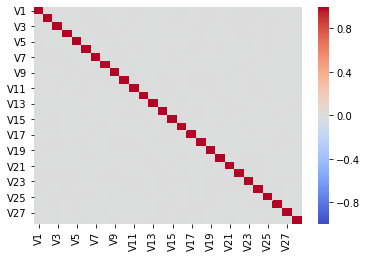

In [49]:
v_df = df[['V'+str(i) for i in range(1,29)]]
sns.heatmap(v_df.corr(), vmin = -1, vmax = 1, cmap='coolwarm')

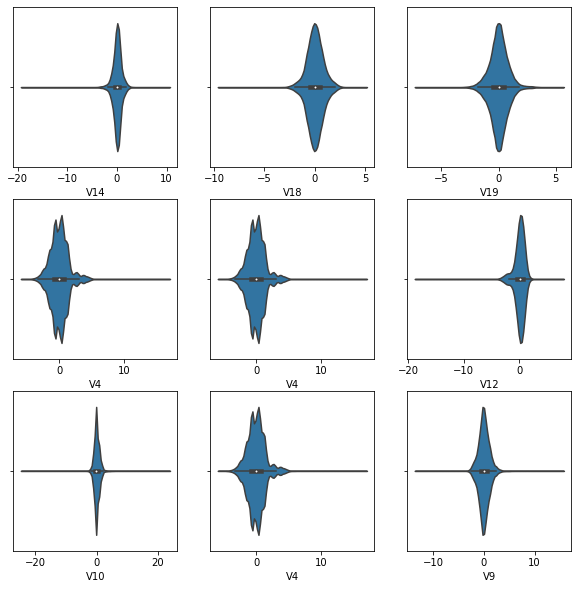

In [9]:
v_nums = [i for i in range(1, 29)]
v_choosed = random.choices(v_nums, k=9)
idx = 0

fig,ax =  plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        sns.violinplot(df["V"+str(v_choosed[idx])], ax = ax[i][j])
        idx += 1

J'ai étudié les variables entre `V1` et `V28`, et j'ai trouvé qu'elle ne sont pas corrélées. 

Ensuites, j'ai choisi 9 variables par hasard pour savoir la distribution des informations encodées de transactions. Les 9 sont centrées. Mais, il y a les outliers dans ces 9 variables.

### Time

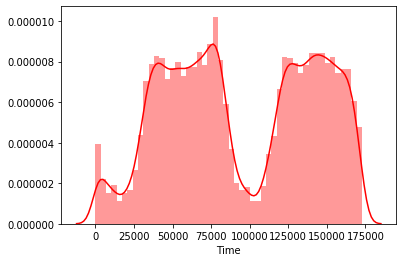

In [10]:
sns.distplot(df['Time'], color='red')

`Time` prend trop de l'importance parce qu'il a les valeurs grandes (comme 175000). Il doit être normalisé. 

### Amount

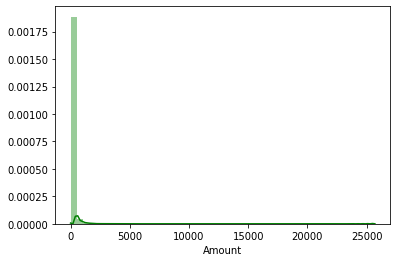

In [11]:
sns.distplot(df['Amount'], color='green')

On voit que la majorité de cette variable est petite(moins de 2500), mais il existe les transactions qui a plus de 25000 (outliers). Elle doit être normalisée.

### Class

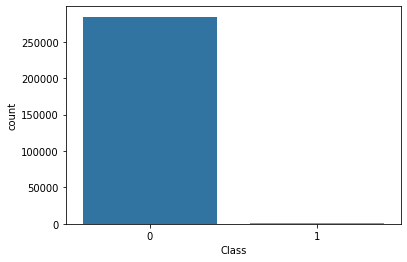

In [12]:
sns.countplot('Class', data=df)

In [13]:
print('Class 1 a {}% des individuels ({}).'.format(round(df['Class'].value_counts()[1]/len(df) * 100,2), df['Class'].value_counts()[1]))

Class 1 a 0.17% des individuels (492).


La plupart des transactions sont non frauduleuses. Si nous utilisons cette base de données comme base pour nos modèles prédictifs et nos analyses, nos algorithmes seront probablement overfitting car ils "supposeront" que la plupart des transactions ne sont pas de la fraude.

Il faut équilibrer ce dataset !

## Preparation des données

### Normaliser `Time` et `Amount`

In [50]:
# RobustScaler est moins sujet aux outliers.
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [51]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### créer train set et test set 

In [52]:
X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = \
train_test_split(X, y, test_size=0.2, random_state=0)

### oversampling train set (SMOTE)

In [53]:
original_ytrain.value_counts()

0    227454
1       391
Name: Class, dtype: int64

In [54]:
smt = SMOTE(random_state=0)
oversampling_Xtrain, oversampling_ytrain = smt.fit_sample(original_Xtrain, original_ytrain)

In [55]:
oversampling_ytrain.value_counts()

1    227454
0    227454
Name: Class, dtype: int64

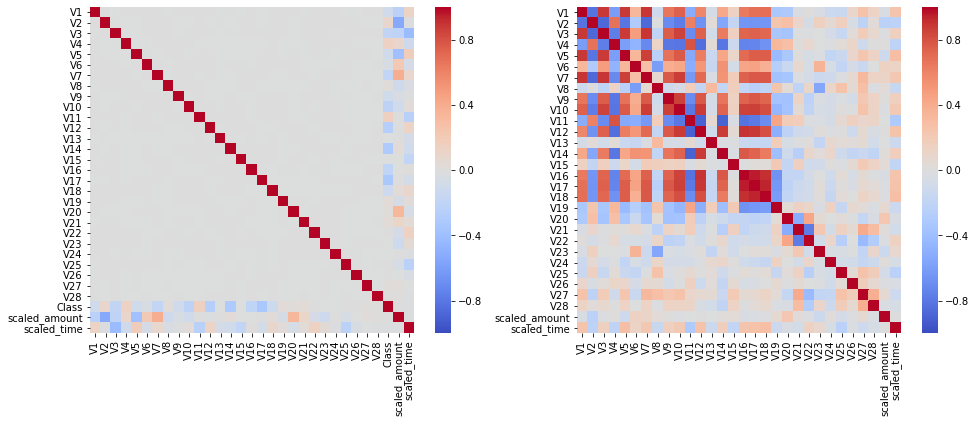

In [56]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(df.corr(), cmap='coolwarm', vmin= -1, vmax= 1, ax= ax[0])
sns.heatmap(oversampling_Xtrain.corr(), cmap='coolwarm', vmin= -1, vmax= 1, ax= ax[1])

In [57]:
# trouver les variables avec corr > 0.85 or < -0.85

oversampling_corr = oversampling_Xtrain.corr()
corr_threhold = abs(oversampling_corr) > 0.85
corr_variables = oversampling_corr.columns[corr_threhold.sum() > 1]
corr_variables

Index(['V1', 'V2', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18'],
      dtype='object')

J'ai appliqué SMOTE pour équilibrer ce dataset. SMOTE génére les données de la class 1, et à la fin, les 2 classes ont le même nombre d'individuel. 

Par contre, SMOTE coréle les variables 'V1', 'V2', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16','V17', 'V18'.

### supprimer les outliers dans train set

On sais qu'il y a des outliers dans les variables de V1 à V28. Je vais supprimer ces outliers. Les outliers sont trouvé par 1.5 * IQR.

J'ai fait la suppression après oversampling parce que j'ai voulu SMOTE utilise toutes les données à générer les 
nouvelles données. 

In [58]:
cleaned_Xtrain = oversampling_Xtrain.copy()
cleaned_ytrain = oversampling_ytrain.copy()

In [59]:
for i in range(1, 29):
    cleaned_Xtrain, cleaned_ytrain = tl.delete_outliers(cleaned_Xtrain, cleaned_ytrain, 'V'+str(i))

In [60]:
cleaned_ytrain.value_counts()

0    114142
1     18819
Name: Class, dtype: int64

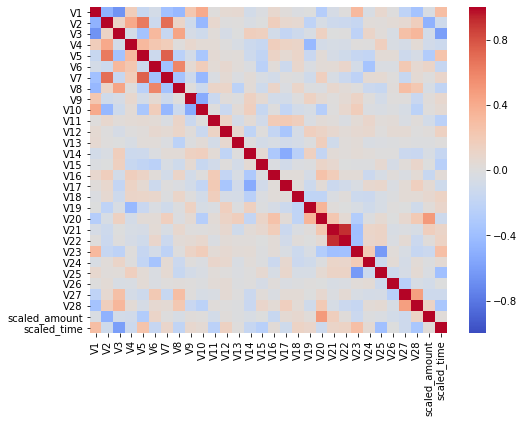

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(cleaned_Xtrain.corr(), cmap='coolwarm', vmin= -1, vmax= 1)

Il reste 114142 indivdeuls dans la classe 0 et 18819 dans la classe 1. Les variables ne sont plus corélées (sauf V20 et V21). Je vais utiliser ce dataset à créer le classifier.

# Création du modèle

J'ai appliqué les algorithmes populaires, et j'ai choisi le meilleur.

In [62]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier() 
}

## trouver le meilleur modèle

In [28]:
for key, classifier in classifiers.items():
    print('====================='+key+'=================')
    classifier.fit(cleaned_Xtrain, cleaned_ytrain)
    y_pred = classifier.predict(original_Xtest)
    print(classification_report(original_ytest, y_pred))

=====================LogisiticRegression=================
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56861
           1       0.02      0.98      0.03       101

    accuracy                           0.90     56962
   macro avg       0.51      0.94      0.49     56962
weighted avg       1.00      0.90      0.95     56962

=====================Support Vector Classifier=================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

=====================DecisionTreeClassifier=================
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.04      0.50      0.08       101


J'ai entrainer les modèle sans modifier les hyper parametres. Je suis intéressé par la performance sur la classe 1 (les transactions frauduleuses). 

F1 score de SVC et randomforest est 0 pour la classe 1. Ces 2 algorithmes ne marchent pas sur notre dataset.

LogisticRegression a 0.98 du rappel sur la classe 1, mais il a 0,02 de la précision sur la classe 1. C'est-à-dire, il a trouvé presque toutes les transactions frauduleuses, mais, il a mal classifé beaucoup de transactions frauduleuses comme transactions innocentes.

La précision sur classe 1 de DecisionTreeClassifier est un peu mieux que celle de LogisticRegression, mais le rappel est beaucoup pire que celui de LogisticRegression.

LogisticRegression est le meilleur modèle entre les 4. J'ai décidé de fair fine-tuning sur LogisticRegression.

## fine-tuning LogisticRegression

J'ai appliqué Cross-Validation (CV) sur LogisticRegression.

Il faut faire oversampling dans les itérations de CV puisque qu'on ne veut pas évaluer le modèle avec les données qui sont utilisées dans l'entrainement.

Donc, j'ai fair KFold sur train set. Ensuite, j'ai fait oversampling sur K-1 folds. A la fin, j'ai évaluer le modèle sur un fold dehors.

In [63]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
K = 5

In [64]:
tl.CV_SMOTE(cleaned_Xtrain, cleaned_ytrain, LogisticRegression(), log_reg_params, n_iter=4, K=5)

{'penalty': 'l2', 'C': 10}
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     22829
           1       0.56      0.92      0.69      3764

    accuracy                           0.88     26593
   macro avg       0.77      0.90      0.81     26593
weighted avg       0.92      0.88      0.90     26593

{'penalty': 'l2', 'C': 0.01}
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     22829
           1       0.54      0.89      0.67      3763

    accuracy                           0.88     26592
   macro avg       0.76      0.88      0.80     26592
weighted avg       0.92      0.88      0.89     26592

{'penalty': 'l2', 'C': 100}
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     22828
           1       0.56      0.91      0.69      3764

    accuracy                           0.88     26592
   macro avg       0.77      0.89      0.81 

J'ai trouvé les meilleurs hyper parameters:
* penalty: l2
* C: 10

# évaluation le modèle



In [68]:
model = LogisticRegression(penalty='l2', C=10)
model.fit(cleaned_Xtrain, cleaned_ytrain)

smote_prediction = model.predict(cleaned_Xtrain)
print(classification_report(cleaned_ytrain, smote_prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    114142
           1       0.78      0.62      0.69     18819

    accuracy                           0.92    132961
   macro avg       0.86      0.80      0.82    132961
weighted avg       0.92      0.92      0.92    132961



In [67]:
smote_prediction = model.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56861
           1       0.02      0.98      0.03       101

    accuracy                           0.89     56962
   macro avg       0.51      0.94      0.49     56962
weighted avg       1.00      0.89      0.94     56962



Le modèle entrainé sur le dataset sans outliers ne marche pas bien sur le dataset avec les outliers. La précision sur la classe 1 est trop bas (0.02). Il a mal classifié trop de données de la classe 1 dans la classe 0. 

Je vais entrainer le modèle avec les outliers.

D'ailleurs, la performance sur CV est beaucoup mieux que celle sur test set. C'est-à-dire, le modèle est overfitting. Peut-être SMOTE n'est pas le meilleur moyen à générer les données.

In [36]:
tl.CV_SMOTE(oversampling_Xtrain, oversampling_ytrain, LogisticRegression(), log_reg_params, n_iter=4, K=5)

{'penalty': 'l2', 'C': 1000}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     45491
           1       0.98      0.92      0.94     45491

    accuracy                           0.95     90982
   macro avg       0.95      0.95      0.95     90982
weighted avg       0.95      0.95      0.95     90982

{'penalty': 'l2', 'C': 0.01}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     45491
           1       0.97      0.91      0.94     45491

    accuracy                           0.94     90982
   macro avg       0.95      0.94      0.94     90982
weighted avg       0.95      0.94      0.94     90982

{'penalty': 'l2', 'C': 1000}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     45491
           1       0.97      0.92      0.94     45491

    accuracy                           0.95     90982
   macro avg       0.95      0.95      0.

In [69]:
model = LogisticRegression(penalty='l2', C=1000)
model.fit(oversampling_Xtrain, oversampling_ytrain)

smote_prediction = model.predict(oversampling_Xtrain)
print(classification_report(oversampling_ytrain, smote_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227454
           1       0.97      0.92      0.94    227454

    accuracy                           0.95    454908
   macro avg       0.95      0.95      0.95    454908
weighted avg       0.95      0.95      0.95    454908



In [70]:
smote_prediction = model.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Le modèle entrainé sur le dataset est un peu mieux qu'avant. Dans CV, la préision et le rappel sont plus de 0.9. Dans test set, F1 score est augmente, de 0.03 à 0.06. Mais, ce n'est pas suffisant.

D'ailleurs, le problèm d'overfitting n'est pas résolu.